##Analiza predictivă a riscului de boli de inimă
În centrul acestui proiect se află o problemă majoră legată de sănătatea inimii, având în vedere amploarea pe care bolile de acest tip o au asupra sănătății publice globale. Esențial este să identificăm și să gestionăm factorii de risc care contribuie la aceste afecțiuni pentru a le preveni și trata eficient. Folosind algoritmi de învățare automată, ne propunem să dezvoltăm modele care să anticipeze probabilitatea apariției bolilor de inimă, bazându-ne pe datele provenite de la Centrul pentru Controlul și Prevenirea Bolilor din SUA, disponibile pe platforma Kaggle. Scopul nostru este să identificăm acești factori de risc și să oferim o predicție precisă a riscului pe care îl poartă fiecare individ în ceea ce privește dezvoltarea bolilor de inimă. Motivația din spatele acestui demers provine din înțelegerea impactului semnificativ pe care bolile cardiovasculare îl au asupra sănătății globale. Astfel, modelul nostru de învățare automată se concentrează pe analiza datelor de sănătate, inclusiv indicele de masă corporală, obiceiurile de fumat, consumul de alcool și altele, în vederea identificării și analizei factorilor de risc relevanți. Astfel, acest proiect își propune să detaliaze pas cu pas procesul nostru de analiză și dezvoltare a
modelului.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease (1).csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn import metrics
from matplotlib import pyplot
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
sns.set_style("white")

<ipython-input-51-2bf06c12a407>:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
import pandas as pd
heart_disease = pd.read_csv('heart_disease.csv')

In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Prelucrarea datelor

Verific daca am date lipsă

In [ ]:
missing_values = heart_disease.isnull().sum()

print("Numărul de valori lipsă în fiecare coloană:")
print(missing_values)

Numărul de valori lipsă în fiecare coloană:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Normalizez variabilele numerice

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime' ]
scaler = MinMaxScaler()
heart_disease[numeric_features] = scaler.fit_transform(heart_disease[numeric_features])

heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.055294,Yes,No,No,0.100000,1.0,No,Female,55-59,White,Yes,Yes,Very good,0.173913,Yes,No,Yes
1,No,0.100447,No,No,Yes,0.000000,0.0,No,Female,80 or older,White,No,Yes,Very good,0.260870,No,No,No
2,No,0.175782,Yes,No,No,0.666667,1.0,No,Male,65-69,White,Yes,Yes,Fair,0.304348,Yes,No,No
3,No,0.147169,No,No,No,0.000000,0.0,No,Female,75-79,White,No,No,Good,0.217391,No,No,Yes
4,No,0.141132,No,No,No,0.933333,0.0,Yes,Female,40-44,White,No,Yes,Very good,0.304348,No,No,No


În coloana 'Diabetic' înlocuiesc valorile 'Yes (during pregnancy)' cu 'Yes' și 'No, borderline diabetes' cu 'No', pentru a putea mai apoi să le transform în valori binare categorice (sau dummy) de tip 0 și 1.

In [ ]:
heart_disease['Diabetic'] = heart_disease['Diabetic'].replace({'No, borderline diabetes': 'No', 'Yes (during pregnancy)': 'Yes'})

Transform datele categorice

In [ ]:
yes_no_columns_to_transform = ['Smoking', 'DiffWalking', 'AlcoholDrinking', 'Stroke', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

def transform(column):
  if column.name in yes_no_columns_to_transform:
    return column.map({'Yes': '1', 'No': '0'})
  if column.name == 'Sex':
    return column.map({'Female': '1', 'Male': '0'})
  if column.name == 'Race':
    return column.map({'White': '5', 'Black': '4', 'American Indian/Alaskan Native': '3', 'Hispanic': '2', 'Asian': '1', 'Other': ' 0'})
  if column.name == 'GenHealth':
    return column.map({'Poor': '1', 'Fair': '2', 'Good': '3', 'Very good': '4', 'Excellent': '5'})
  return column

for (columnName, columnData) in heart_disease.iteritems():
  heart_disease[columnName] = transform(heart_disease[columnName])

heart_disease.head()

<ipython-input-58-631c2ce917f6>:14: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in heart_disease.iteritems():


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.055294,1,0,0,0.100000,1.0,0,1,55-59,5,1,1,4,0.173913,1,0,1
1,No,0.100447,0,0,1,0.000000,0.0,0,1,80 or older,5,0,1,4,0.260870,0,0,0
2,No,0.175782,1,0,0,0.666667,1.0,0,0,65-69,5,1,1,2,0.304348,1,0,0
3,No,0.147169,0,0,0,0.000000,0.0,0,1,75-79,5,0,0,3,0.217391,0,0,1
4,No,0.141132,0,0,0,0.933333,0.0,1,1,40-44,5,0,1,4,0.304348,0,0,0


Acum voi efectua o mapare a valorilor din coloana 'AgeCategory' a unui DataFrame, utilizând un dicționar de mapare pentru a asocia fiecărui interval de vârstă un cod numeric corespunzător.

In [ ]:
age_mapping = {
    "18-24": 1,
    "25-29": 2,
    "30-34": 3,
    "35-39": 4,
    "40-44": 5,
    "45-49": 6,
    "50-54": 7,
    "55-59": 8,
    "60-64": 9,
    "65-69": 10,
    "70-74": 11,
    "75-79": 12,
    "80 or older": 13
}

heart_disease['AgeCategory'] = heart_disease['AgeCategory'].map(age_mapping)

heart_disease.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.055294,1,0,0,0.100000,1.0,0,1,8,5,1,1,4,0.173913,1,0,1
1,No,0.100447,0,0,1,0.000000,0.0,0,1,13,5,0,1,4,0.260870,0,0,0
2,No,0.175782,1,0,0,0.666667,1.0,0,0,10,5,1,1,2,0.304348,1,0,0
3,No,0.147169,0,0,0,0.000000,0.0,0,1,12,5,0,0,3,0.217391,0,0,1
4,No,0.141132,0,0,0,0.933333,0.0,1,1,5,5,0,1,4,0.304348,0,0,0


Identific outlier-ii, după care îi elimin pe baza deviației standard pentru variabilele numerice

In [ ]:
import numpy as np

numeric_columns = heart_disease.select_dtypes(include=np.number).columns.tolist()

for column in numeric_columns:
    Q1 = heart_disease[column].quantile(0.25)
    Q3 = heart_disease[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = heart_disease[(heart_disease[column] < lower_limit) | (heart_disease[column] > upper_limit)]

    print(f"Outliers for column {column}: {len(outliers)}")
    print(outliers)

Outliers for column BMI: 10396
       HeartDisease       BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
32               No  0.402390       0               0      0        1.000000   
57               No  0.416516       1               0      0        1.000000   
90               No  0.389593       0               0      0        1.000000   
105              No  0.561632       0               0      0        1.000000   
107              No  0.403236       0               0      0        0.000000   
...             ...       ...     ...             ...    ...             ...   
319693           No  0.389593       0               0      0        0.000000   
319709           No  0.476156       1               0      0        1.000000   
319725           No  0.496680       0               0      0        0.966667   
319777           No  0.368828       0               0      0        0.000000   
319794           No  0.416999       0               0      0        0.000000   

        

In [ ]:
for column in numeric_features:
    mean = heart_disease[column].mean()
    std = heart_disease[column].std()
    heart_disease = heart_disease[(heart_disease[column] > mean - 2 * std) & (heart_disease[column] < mean + 2 * std)]

#Explorarea datelor

Acum separ variabila țintă

In [ ]:
x = heart_disease.drop('HeartDisease', axis=1)
y = heart_disease['HeartDisease']

In [ ]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0.100447,0,0,1,0.000000,0.0,0,1,13,5,0,1,4,0.260870,0,0,0
3,0.147169,0,0,0,0.000000,0.0,0,1,12,5,0,0,3,0.217391,0,0,1
7,0.236871,1,0,0,0.166667,0.0,1,1,13,5,1,0,3,0.347826,1,0,0
8,0.174212,0,0,0,0.000000,0.0,0,1,13,5,0,0,2,0.173913,0,1,0
11,0.201497,1,0,0,0.000000,0.0,0,1,8,5,0,1,4,0.173913,0,0,0


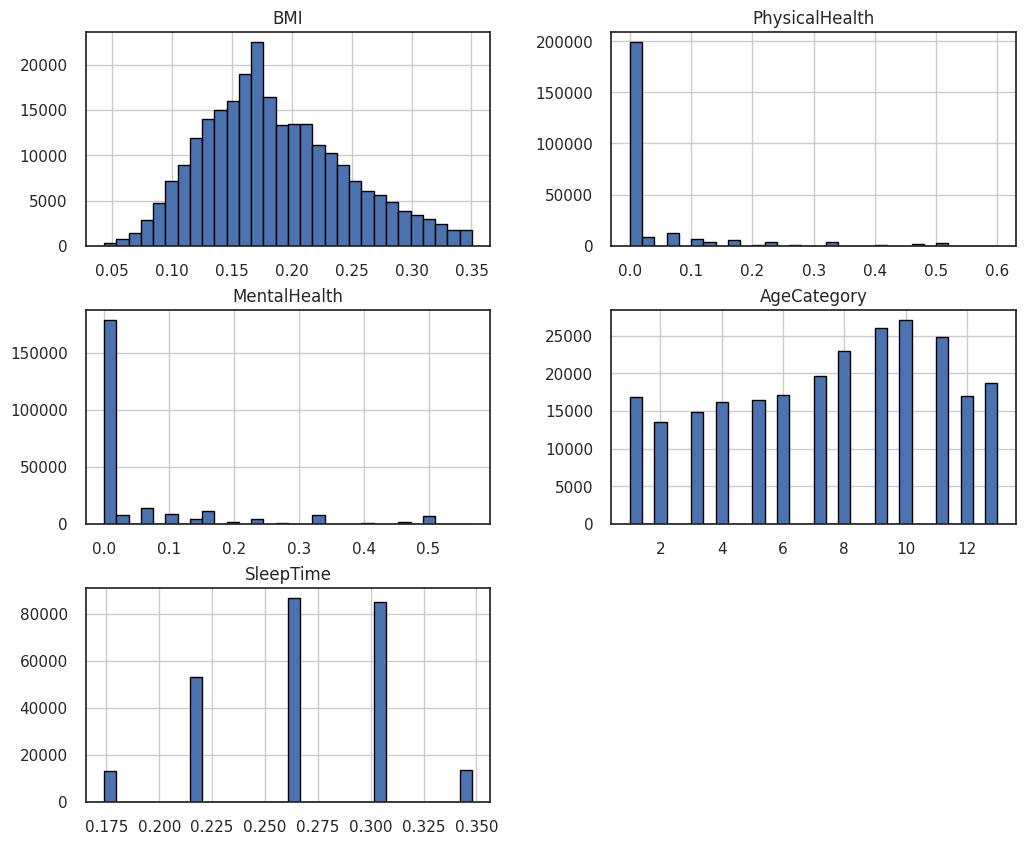

In [ ]:
_ = x.hist(figsize=(12, 10), bins=30, edgecolor="black")

In [ ]:
y.head()

1     No
3     No
7     No
8     No
11    No
Name: HeartDisease, dtype: object

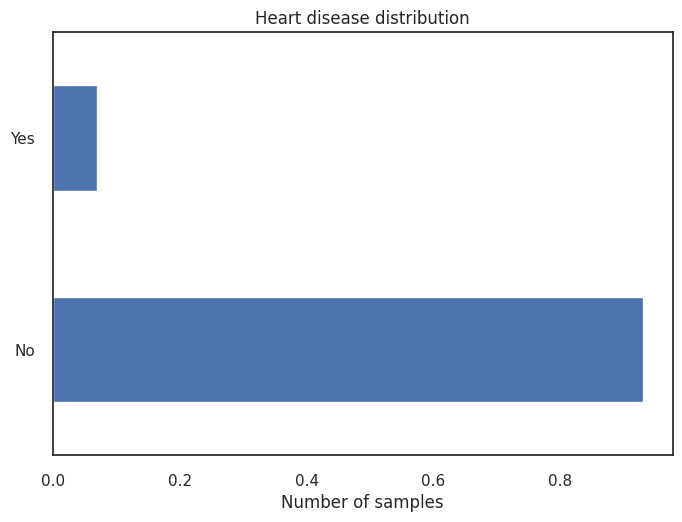

In [ ]:
import matplotlib.pyplot as plt

y.value_counts(normalize=True).plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Heart disease distribution")

In [ ]:
y.value_counts()

No     233936
Yes     17445
Name: HeartDisease, dtype: int64

Având în vedere faptul că modelul a fost antrenat pe un set de date în care majoritatea observațiilor au rezultatul "No". Acest lucru ar putea determina modelul să prezică în mod predeterminat "No", având în vedere că ar obține acuratețe înaltă dacă majoritatea datelor sunt "No". Astfel, o să multiplic aleator observațiile clasei subreprezentate pentru a echilibra numărul de observații între clase prin Oversampling.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)
heart_disease_resampled = pd.concat([pd.DataFrame(x_resampled, columns=x.columns), pd.Series(y_resampled, name='HeartDisease')], axis=1)

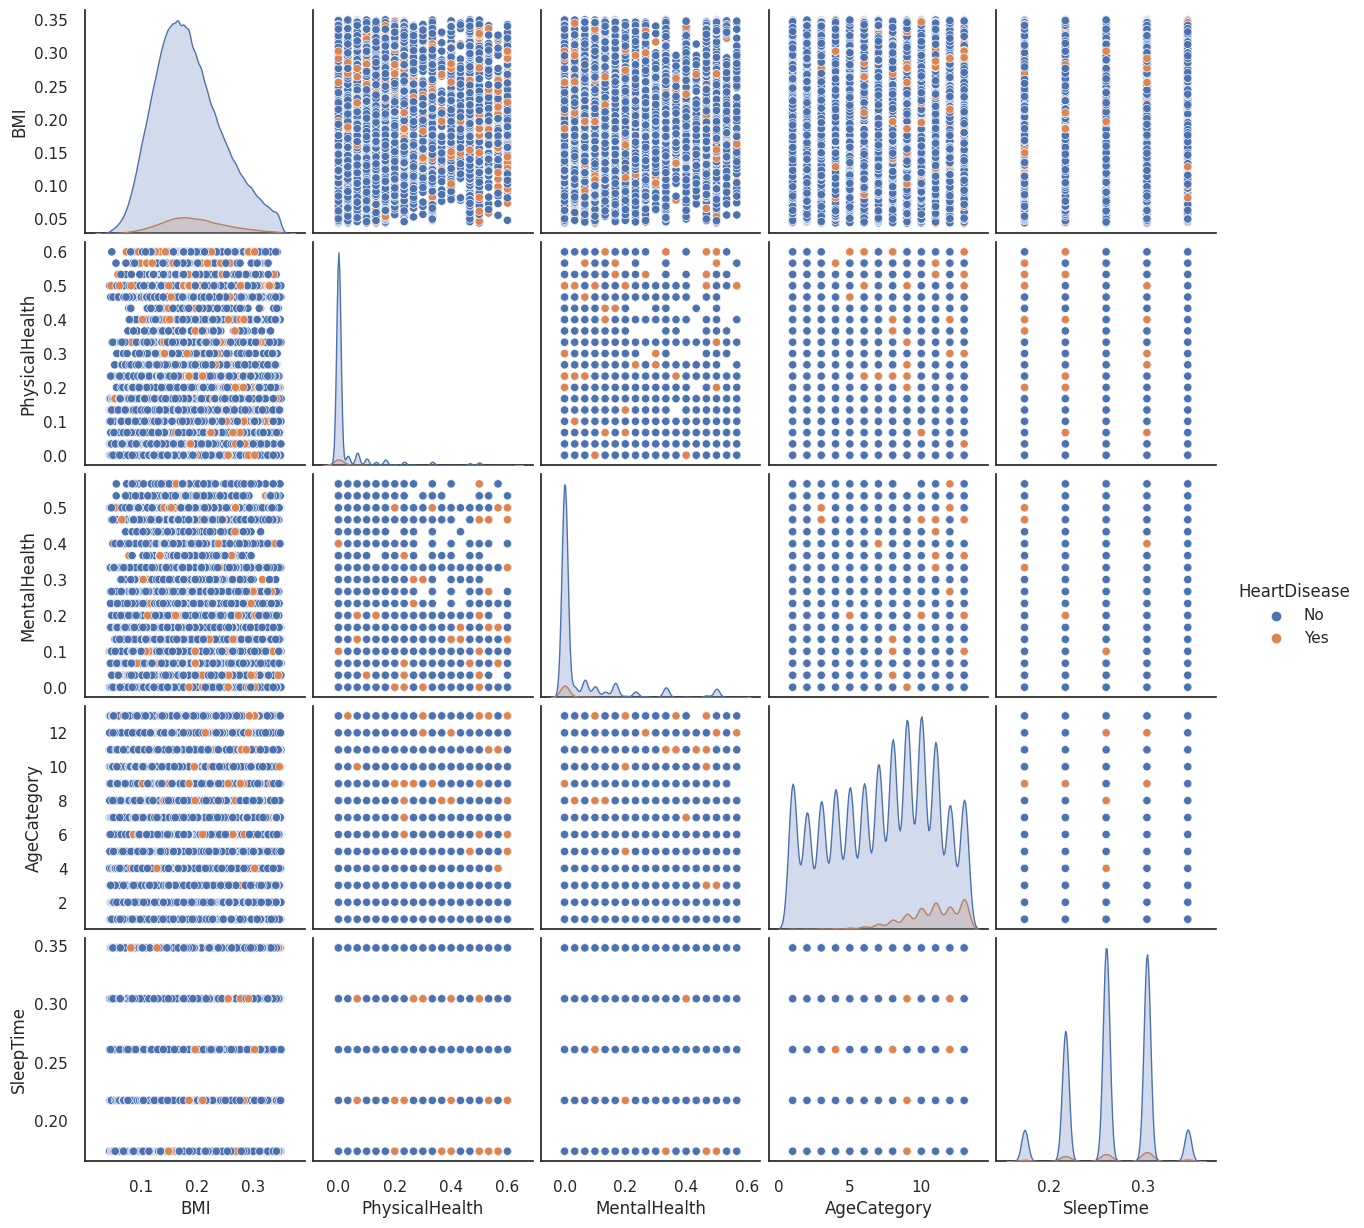

In [ ]:
import seaborn as sns

_ = sns.pairplot(heart_disease, hue="HeartDisease")

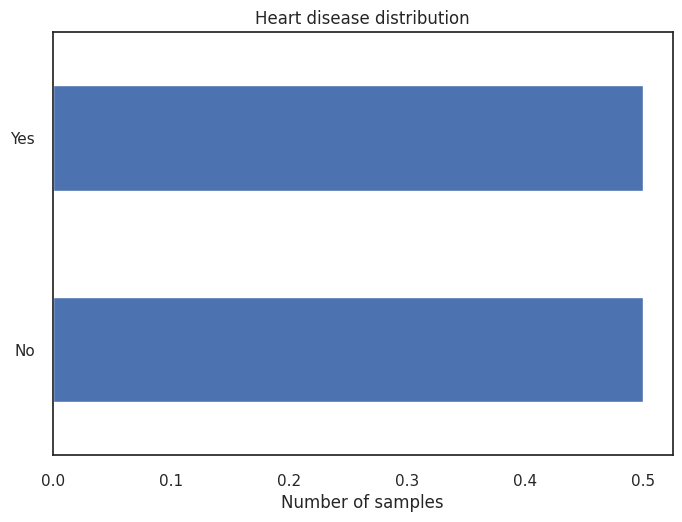

In [ ]:
import matplotlib.pyplot as plt

y_resampled.value_counts(normalize=True).plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Heart disease distribution")

In [ ]:
y_resampled.value_counts()

No     233936
Yes    233936
Name: HeartDisease, dtype: int64

In [ ]:
y_resampled.value_counts(normalize=True)

No     0.5
Yes    0.5
Name: HeartDisease, dtype: float64

Divizez setul de date în: set de date de antrenare și set de date de testare

In [ ]:
from sklearn.model_selection import train_test_split

x_resampled_train, x_resampled_test, y_resampled_train, y_resampled_test = train_test_split(
    x_resampled, y_resampled, shuffle=True, random_state=42, test_size=0.3
)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_resampled_train, y_resampled_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Antrenez modelul Logistic Regression, realizez predicții pe setul de testare și evaluez performanța modelului

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_resampled_train, y_resampled_train)

y_resampled_predicted = model.predict(x_resampled_test)

accuracy = accuracy_score(y_resampled_test, y_resampled_predicted)
conf_matrix = confusion_matrix(y_resampled_test, y_resampled_predicted)
classification_rep = classification_report(y_resampled_test, y_resampled_predicted)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.76
Confusion Matrix:
[[51993 18128]
 [15026 55215]]
Classification Report:
              precision    recall  f1-score   support

          No       0.78      0.74      0.76     70121
         Yes       0.75      0.79      0.77     70241

    accuracy                           0.76    140362
   macro avg       0.76      0.76      0.76    140362
weighted avg       0.76      0.76      0.76    140362



In [ ]:
y_resampled_test == y_resampled_predicted

188474     True
396425     True
80022     False
249844     True
302643     True
          ...  
399805     True
10314      True
303210     True
183631     True
353366    False
Name: HeartDisease, Length: 140362, dtype: bool

Acuratețe și Compararea cu Predicțiile Reale:
Am verificat acuratețea modelului atât prin intermediul unor operații de verificare cu numpy, cât și utilizând metoda score.

In [ ]:
import numpy as np

np.mean(y_resampled_test == y_resampled_predicted)

0.7637964691298215

In [ ]:
classifier.score(x_resampled_test, y_resampled_test)

0.7643165529131817

In [ ]:
y_resampled_test.value_counts()

Yes    70241
No     70121
Name: HeartDisease, dtype: int64

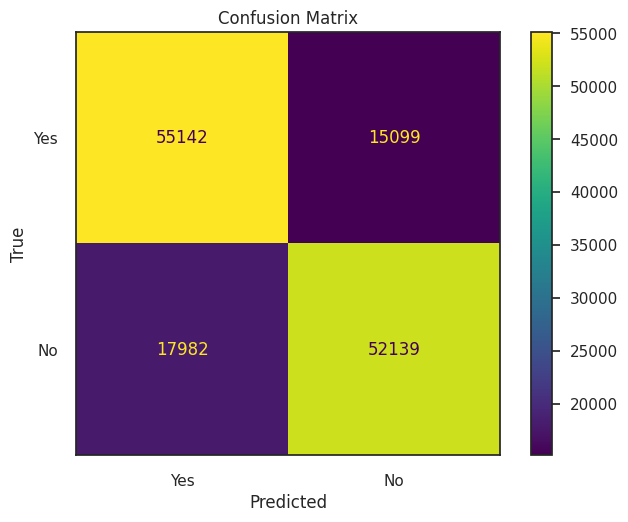

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier, x_resampled_test, y_resampled_test, labels=['Yes', 'No'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Pentru a genera curba ROC calculez probabilitățile aferente claselor, ratele de adevărat pozitiv și fals pozitiv pentru curba ROC, apoi calculez aria de sub curbă

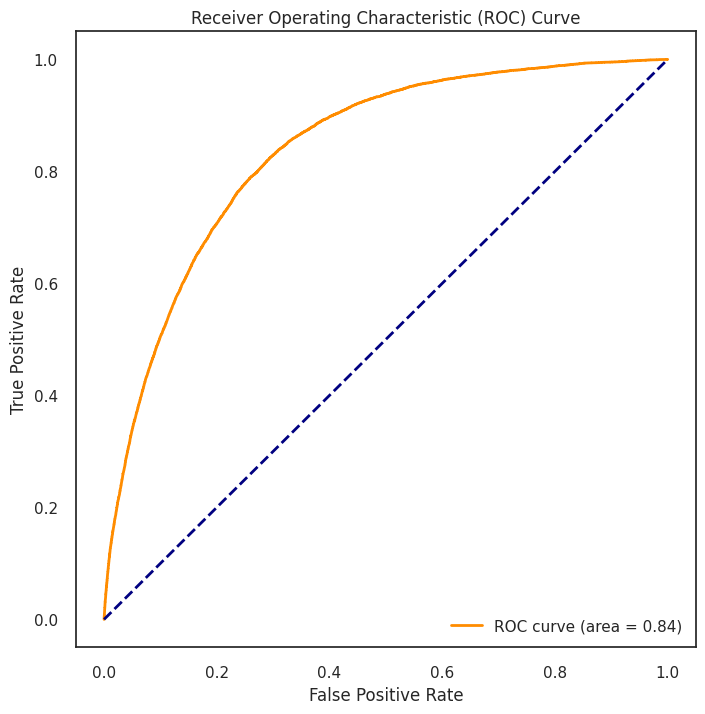

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_resampled_probs = classifier.predict_proba(x_resampled_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_resampled_test, y_resampled_probs, pos_label='Yes')

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_without_selection = RandomForestClassifier(n_jobs=2)

Antrenez modelul Random Forest, realizez predicții pe setul de testare și evaluez performanța modelului

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_resampled_train, y_resampled_train)

y_resampled_pred = rf_model.predict(x_resampled_test)

accuracy = accuracy_score(y_resampled_test, y_resampled_pred)
conf_matrix = confusion_matrix(y_resampled_test, y_resampled_pred)
classification_rep = classification_report(y_resampled_test, y_resampled_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.97
Confusion Matrix:
[[65750  4371]
 [   30 70211]]
Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.94      0.97     70121
         Yes       0.94      1.00      0.97     70241

    accuracy                           0.97    140362
   macro avg       0.97      0.97      0.97    140362
weighted avg       0.97      0.97      0.97    140362



Calculez matricea de confuzie și generez un heatmap

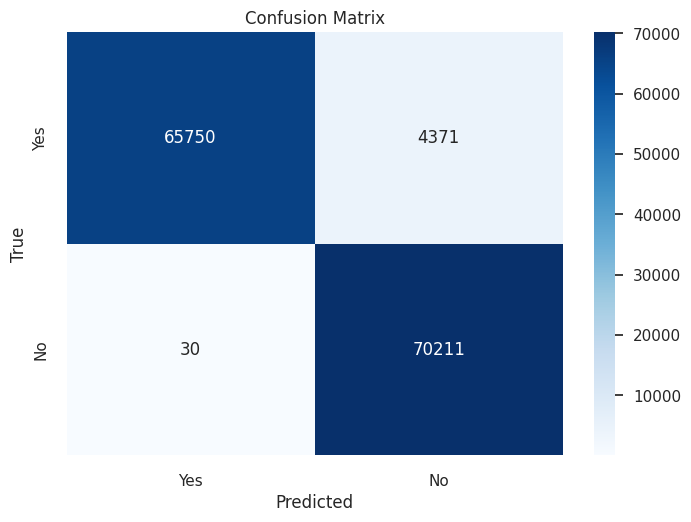

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_resampled_test, y_resampled_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

În cadrul modelului Random Forest obțin și prezint importanța caracteristicilor din model, le sortez în funcție de importanță și generez un grafic cu bare

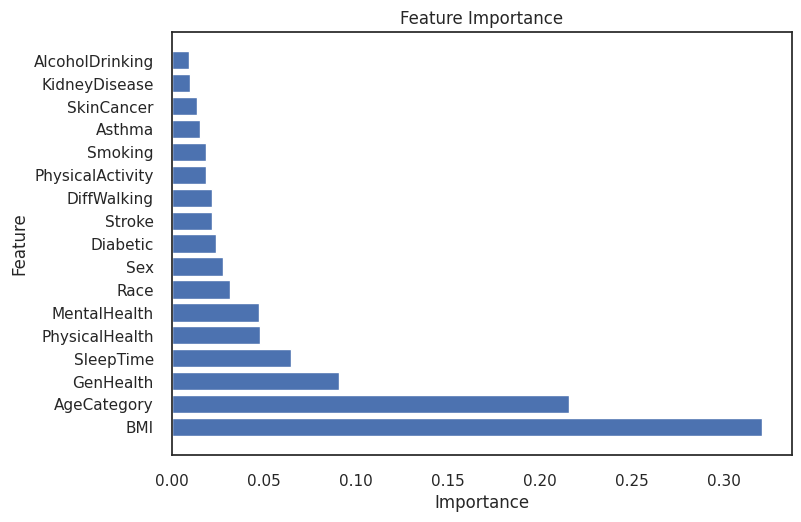

In [ ]:
feature_importances = rf_model.feature_importances_

sorted_features = sorted(zip(feature_importances, x_resampled_train.columns), reverse=True)

importance, feature = zip(*sorted_features)

plt.barh(feature, importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Pentru a genera curba ROC calculez probabilitățile aferente claselor, ratele de adevărat pozitiv și fals pozitiv pentru curba ROC, apoi calculez aria de sub curbă

In [ ]:
from sklearn.metrics import roc_curve, auc

y_resampled_probs = rf_model.predict_proba(x_resampled_test)[:, 1]

fpr, tpr,thresholds = roc_curve(y_resampled_test, y_resampled_probs, pos_label='Yes')

roc_auc = auc(fpr, tpr)

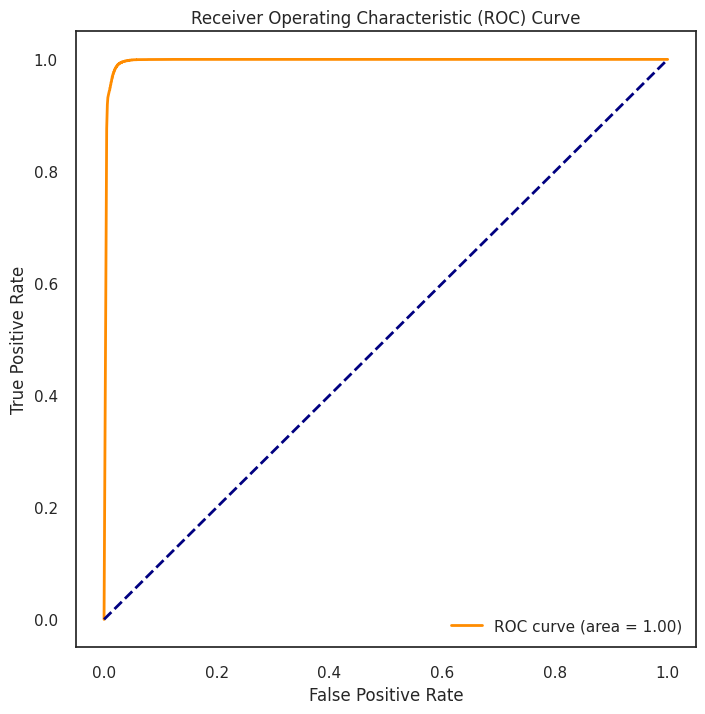

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()